# Task 4.10 Part 1

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Import data file "orders_products_customers_combined.pkl"
ords_prods_customers_merge = pd.read_pickle('/Users/marika/Instacart Basket Analysis 04.14.24/02 Data/Prepared Data/orders_products_customers_merged.pkl')

In [4]:
ords_prods_customers_merge.head()

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,...,department_id,prices,merge_indicator,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Average orders,Regular,Low spender,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,Regular,Low spender,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Average orders,Regular,Low spender,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,16,12.6,both,Mid-range product,Regularly busy,Regularly busy,Average orders,Regular,Low spender,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,16,12.6,both,Mid-range product,Regularly busy,Slowest days,Average orders,Regular,Low spender,Regular customer


In [5]:
# Security implications need to be addressed. PII data such as first_name and surname need to be dropped.

In [6]:
# Drop personal information
ords_prods_customers_merge.drop(columns=['first_name','surname'], inplace= True)

In [7]:
# Check whether the columns have been dropped
ords_prods_customers_merge.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,Unnamed: 0_x,order_id,...,department_id,prices,merge_indicator,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,order_frequency_flag
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,443895,2543867,...,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Average orders,Regular,Low spender,Regular customer
1,26711,Female,Missouri,48,2017-01-01,3,married,165665,443897,1285508,...,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,Regular,Low spender,Regular customer
2,26711,Female,Missouri,48,2017-01-01,3,married,165665,443898,2578584,...,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Average orders,Regular,Low spender,Regular customer
3,26711,Female,Missouri,48,2017-01-01,3,married,165665,443892,423547,...,16,12.6,both,Mid-range product,Regularly busy,Regularly busy,Average orders,Regular,Low spender,Regular customer
4,26711,Female,Missouri,48,2017-01-01,3,married,165665,443893,2524893,...,16,12.6,both,Mid-range product,Regularly busy,Slowest days,Average orders,Regular,Low spender,Regular customer


In [8]:
# Set up a loc function for the new region column
ords_prods_customers_merge.loc[ords_prods_customers_merge['state'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania',
'New Jersey']),'region'] = 'Northeast'
ords_prods_customers_merge.loc[ords_prods_customers_merge['state'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska',
'Kansas','Minnesota','Iowa','Missouri']),'region'] = 'Midwest' 
ords_prods_customers_merge.loc[ords_prods_customers_merge['state'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia',
'Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']),'region'] = 'South'
ords_prods_customers_merge.loc[ords_prods_customers_merge['state'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico',
'Alaska','Washington','Oregon','California','Hawaii']),'region'] = 'West'

In [9]:
# Check the amount of values in the region column
ords_prods_customers_merge['region'].value_counts(dropna= False)

region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

In [10]:
# Count the number of orders per customer
orders_per_customer = ords_prods_customers_merge.groupby('user_id')['order_id'].nunique()

In [11]:
# Create a DataFrame from the series
orders_per_customer = orders_per_customer.reset_index()
orders_per_customer.columns = ['user_id', 'order_count']

In [12]:
# Merge this back into the main DataFrame
ords_prods_customers_merge = pd.merge(ords_prods_customers_merge, orders_per_customer, on='user_id', how='left')

In [13]:
# Create an exclusion flag column
ords_prods_customers_merge['exclusion_flag'] = ords_prods_customers_merge['order_count'] < 5

In [14]:
# Filter out low-activity customers
filtered_data = ords_prods_customers_merge[ords_prods_customers_merge['exclusion_flag'] == False]

In [15]:
# Export the filtered data to a new CSV file
filtered_data.to_csv('filtered_ords_prods_customers_merge.csv', index=False)

In [16]:
# Display the first few rows of the filtered data
filtered_data.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,Unnamed: 0_x,order_id,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,order_frequency_flag,region,order_count,exclusion_flag
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,443895,2543867,...,Mid-range product,Regularly busy,Busiest days,Average orders,Regular,Low spender,Regular customer,Midwest,8,False
1,26711,Female,Missouri,48,2017-01-01,3,married,165665,443897,1285508,...,Mid-range product,Regularly busy,Regularly busy,Average orders,Regular,Low spender,Regular customer,Midwest,8,False
2,26711,Female,Missouri,48,2017-01-01,3,married,165665,443898,2578584,...,Mid-range product,Regularly busy,Busiest days,Average orders,Regular,Low spender,Regular customer,Midwest,8,False
3,26711,Female,Missouri,48,2017-01-01,3,married,165665,443892,423547,...,Mid-range product,Regularly busy,Regularly busy,Average orders,Regular,Low spender,Regular customer,Midwest,8,False
4,26711,Female,Missouri,48,2017-01-01,3,married,165665,443893,2524893,...,Mid-range product,Regularly busy,Slowest days,Average orders,Regular,Low spender,Regular customer,Midwest,8,False


In [17]:
# Check the amount of values in the exclusion_flag column
ords_prods_customers_merge['exclusion_flag'].value_counts()

exclusion_flag
False    30992655
True      1441557
Name: count, dtype: int64

In [18]:
# Create a new column for different age categories
ords_prods_customers_merge.loc[ords_prods_customers_merge['age'] < 18,'age_type'] = 'Teenager'
ords_prods_customers_merge.loc[(ords_prods_customers_merge['age'] >= 18) & (ords_prods_customers_merge['age'] <= 25),'age_type'] = 'Young Adult'
ords_prods_customers_merge.loc[(ords_prods_customers_merge['age'] >= 26) & (ords_prods_customers_merge['age'] <= 44),'age_type'] = 'Adult'
ords_prods_customers_merge.loc[(ords_prods_customers_merge['age'] >= 45) & (ords_prods_customers_merge['age'] <= 59),'age_type'] = 'Middle age'
ords_prods_customers_merge.loc[ords_prods_customers_merge['age'] >= 60,'age_type'] = 'Senior'

In [19]:
# Check the values in the new age_type column
ords_prods_customers_merge['age_type'].value_counts(dropna= False)

age_type
Senior         11077150
Adult           9653287
Middle age      7654766
Young Adult     4049009
Name: count, dtype: int64

In [20]:
# Create a new column for different income categories
ords_prods_customers_merge.loc[ords_prods_customers_merge['income'] <= 50000,'income_type'] = 'Low'
ords_prods_customers_merge.loc[(ords_prods_customers_merge['income'] > 50000) & (ords_prods_customers_merge['income'] <= 100000),'income_type'] = 'Middle'
ords_prods_customers_merge.loc[ords_prods_customers_merge['income'] > 100000,'income_type'] = 'High'

In [21]:
# Check the values in the new income_type column
ords_prods_customers_merge['income_type'].value_counts(dropna= False)

income_type
High      14826772
Middle    14009569
Low        3597871
Name: count, dtype: int64

In [22]:
# Check the values in the n_dependants column
ords_prods_customers_merge['n_dependants'].value_counts(dropna= False)

n_dependants
3       8142318
0       8105197
2       8098387
1       8088310
<NA>          0
Name: count, dtype: Int64

In [23]:
# Create a new column for different dependant types
ords_prods_customers_merge.loc[ords_prods_customers_merge['n_dependants'] == 0,'dependant_type'] = 'No dependants'
ords_prods_customers_merge.loc[ords_prods_customers_merge['n_dependants'] > 0,'dependant_type'] = 'Has dependants'

In [24]:
# Check the values in the new dependant_type column
ords_prods_customers_merge['dependant_type'].value_counts(dropna= False)

dependant_type
Has dependants    24329015
No dependants      8105197
Name: count, dtype: int64

# 2. Visualizations

In [26]:
ords_prods_customers_merge['fam_status'].value_counts(dropna= False)

fam_status
married                             22776913
single                               5330769
divorced/widowed                     2774428
living with parents and siblings     1552102
Name: count, dtype: int64

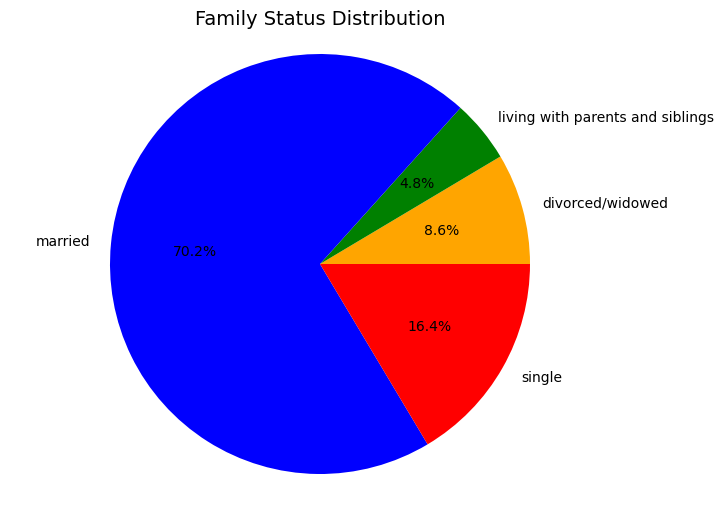

In [27]:
# Create a pie chart for the distribution of family status and export it as a png file
fam_status_distribution = (ords_prods_customers_merge['fam_status'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8, 6))  
plt.pie(fam_status_distribution, labels=fam_status_distribution.index, autopct='%1.1f%%', colors=['orange', 'green', 'blue','red'])
plt.title('Family Status Distribution', fontsize=14)
plt.axis('equal') 
path = path = '/Users/marika/Instacart Basket Analysis 04.14.24'
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_fam_status.png'))

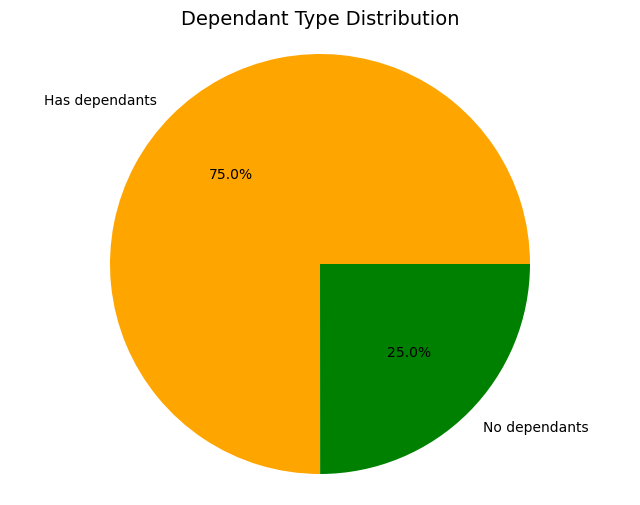

In [28]:
# Create a pie chart fot the distribution of dependant types and export it as a png file
dependant_distribution = (ords_prods_customers_merge['dependant_type'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8, 6))  
plt.pie(dependant_distribution, labels=dependant_distribution.index, autopct='%1.1f%%', colors=['orange', 'green'])
plt.title('Dependant Type Distribution', fontsize=14)
plt.axis('equal') 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_dependant_types.png'))

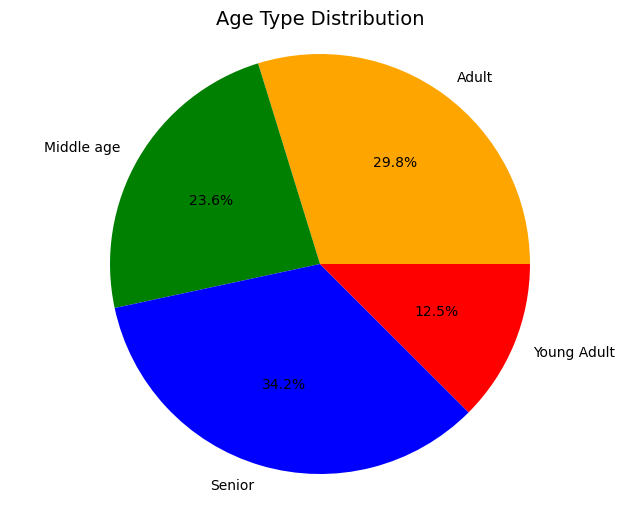

In [29]:
# Create a pie chart for the distribution of age types and export it as a png file
age_type_distribution = (ords_prods_customers_merge['age_type'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8, 6))  
plt.pie(age_type_distribution, labels=age_type_distribution.index, autopct='%1.1f%%', colors=['orange', 'green', 'blue','red'])
plt.title('Age Type Distribution', fontsize=14)
plt.axis('equal') 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_age_types.png'))

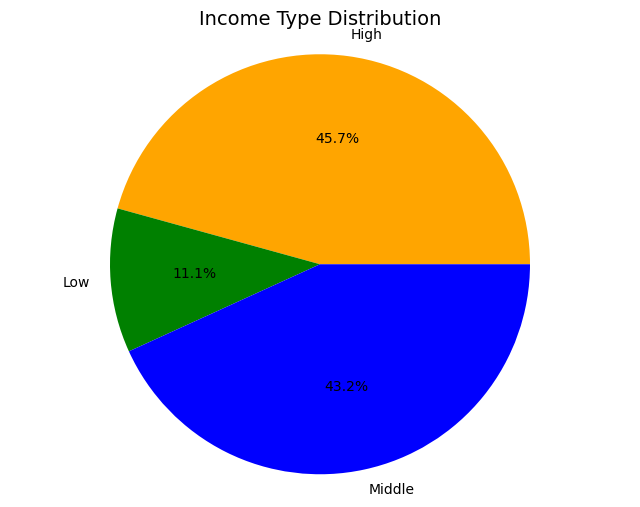

In [30]:
# Create a pie chart for the distribution of income types and export it as a png file
income_type_distribution = (ords_prods_customers_merge['income_type'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8, 6)) 
plt.pie(income_type_distribution, labels=income_type_distribution.index, autopct='%1.1f%%', colors=['orange', 'green', 'blue'])
plt.title('Income Type Distribution', fontsize=14)
plt.axis('equal') 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_income_types.png'))

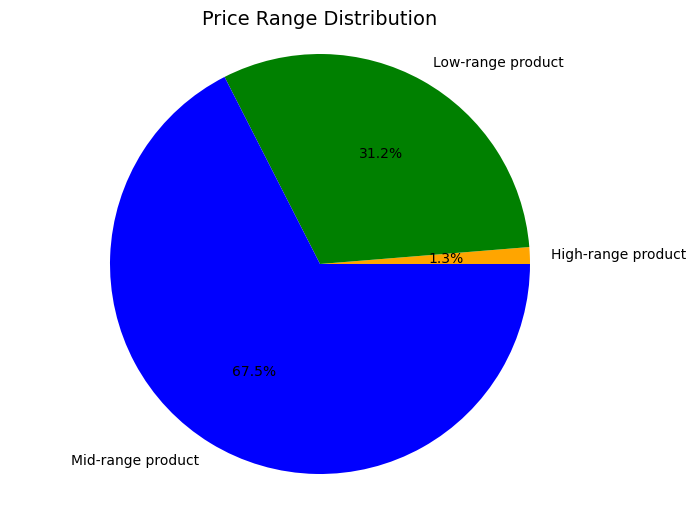

In [31]:
# Create a pie chart fot the distribution of price ranges
price_range_distribution = (ords_prods_customers_merge['price_range_loc'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8, 6))  
plt.pie(price_range_distribution, labels=price_range_distribution.index, autopct='%1.1f%%', colors=['orange', 'green', 'blue'])
plt.title('Price Range Distribution', fontsize=14)
plt.axis('equal') 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_price_ranges.png'))

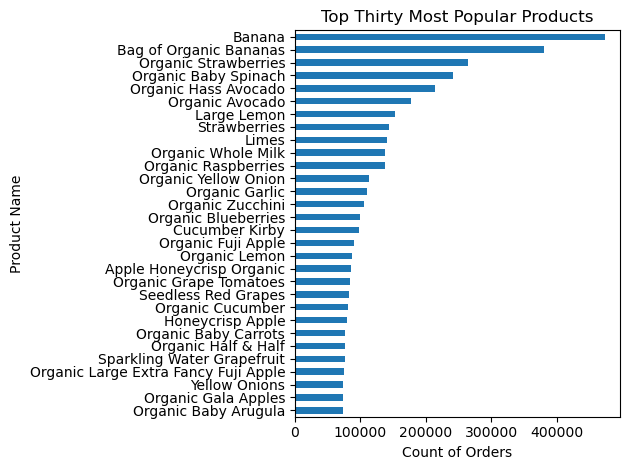

In [32]:
# Create a horizontal bar chart for the top 30 most popular products
different_products = ords_prods_customers_merge['product_name'].value_counts().nlargest(30).sort_values(ascending=True).plot.barh()
plt.title('Top Thirty Most Popular Products')
plt.xlabel('Count of Orders')
plt.ylabel('Product Name')
plt.tight_layout()

In [33]:
# Export the horizontal bar chart as a png file
different_products.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_top_30_products.png'))

In [34]:
# Check the values in the department_id column
ords_prods_customers_merge['department_id'].value_counts()

department_id
4     9479291
16    5414016
19    2887550
7     2688159
1     2236432
13    1875577
3     1176787
15    1068058
20    1051249
9      866627
17     738666
14     710647
12     708931
11     447691
18     423802
6      269253
5      153743
8       97724
21      69145
2       36291
10      34573
Name: count, dtype: int64

In [35]:
# Create a new column to identify different department IDs
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 1,'department_name'] = 'frozen'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 2,'department_name'] = 'other'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 3,'department_name'] = 'bakery'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 4,'department_name'] = 'produce'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 5,'department_name'] = 'alcohol'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 6,'department_name'] = 'international'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 7,'department_name'] = 'beverages'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 8,'department_name'] = 'pets'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 9,'department_name'] = 'dry goods pasta'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 10,'department_name'] = 'bulk'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 11,'department_name'] = 'personal care'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 12,'department_name'] = 'meawt seafood'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 13,'department_name'] = 'pantry'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 14,'department_name'] = 'breakfast'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 15,'department_name'] = 'canned goods'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 16,'department_name'] = 'dasiry eggs'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 17,'department_name'] = 'household'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 18,'department_name'] = 'babies'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 19,'department_name'] = 'snacks'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 20,'department_name'] = 'deli'
ords_prods_customers_merge.loc[ords_prods_customers_merge['department_id'] == 21,'department_name'] = 'missing'

In [36]:
# Double check the values in the department_name column
ords_prods_customers_merge['department_name'].value_counts()

department_name
produce            9479291
dasiry eggs        5414016
snacks             2887550
beverages          2688159
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           710647
meawt seafood       708931
personal care       447691
babies              423802
international       269253
alcohol             153743
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

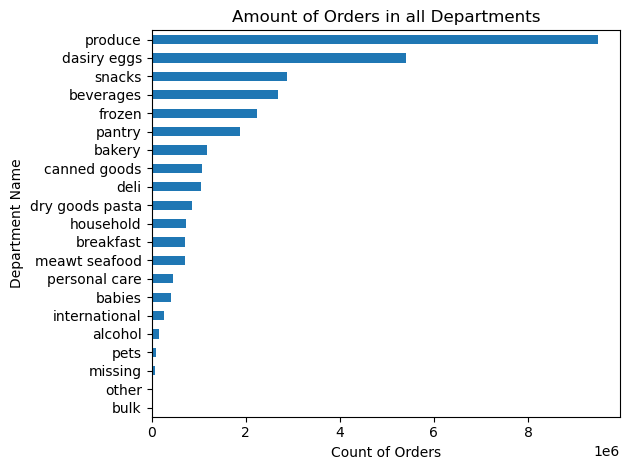

In [37]:
# Create a horizontal bar chart for the amount of orders in all departments
barh_ords_depts = ords_prods_customers_merge['department_name'].value_counts().nlargest(30).sort_values(ascending=True).plot.barh()
plt.title('Amount of Orders in all Departments')
plt.xlabel('Count of Orders')
plt.ylabel('Department Name')
plt.tight_layout()

In [38]:
# Export the horizontal bar chart as a png file
barh_ords_depts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_orders_in_departments.png'))

In [39]:
# Create a dataframe for total spending grouped by days of the week
avg_spending_days = ords_prods_customers_merge.groupby(['orders_day_of_week'])['prices'].sum()

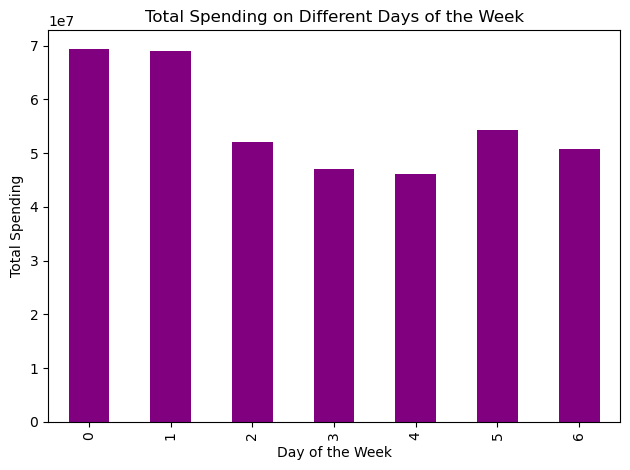

In [40]:
# Create a bar chart for total spending grouped by days of the week 
bar_total_spending_days = avg_spending_days.plot.bar(color='purple')
plt.title('Total Spending on Different Days of the Week')
plt.ylabel('Total Spending')
plt.xlabel('Day of the Week')
plt.tight_layout()

In [41]:
# Export the bar chart as a png file
bar_total_spending_days.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_total_spending_days.png'))

In [42]:
# Create a dataframe for total spending grouped by hours of the day
total_spending_hours = ords_prods_customers_merge.groupby(['order_hour_of_day'])['prices'].mean()

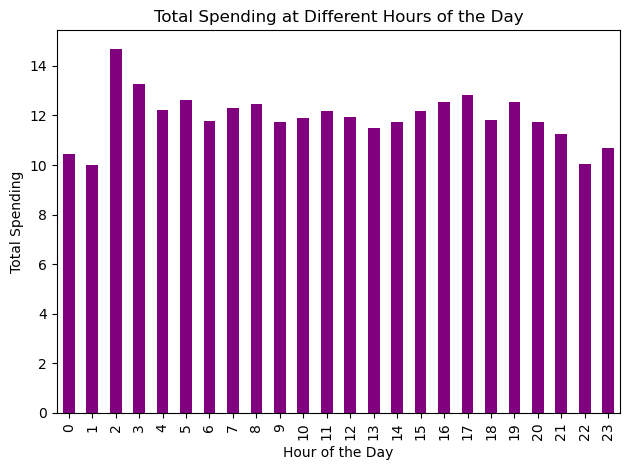

In [43]:
# Create a bar chart for average spending grouped by hours of the day
bar_total_spending_hours = total_spending_hours.plot.bar(color='purple')
plt.title('Total Spending at Different Hours of the Day')
plt.ylabel('Total Spending')
plt.xlabel('Hour of the Day')
plt.tight_layout()

In [44]:
# Export the bar chart as a png file
bar_total_spending_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_total_spending_hours.png'))

In [45]:
# Create a dataframe for orders at 2 am
order_hour_at_2am = ords_prods_customers_merge[ords_prods_customers_merge['order_hour_of_day'] == 2]

In [46]:
order_hour_at_2am.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,Unnamed: 0_x,order_id,...,loyalty_flag,spending_flag,order_frequency_flag,region,order_count,exclusion_flag,age_type,income_type,dependant_type,department_name
14128,93034,Female,Florida,56,2017-01-01,0,single,87563,1548573,2770996,...,Loyal,Low spender,Frequent customer,South,11,False,Middle age,Middle,No dependants,dasiry eggs
14129,93034,Female,Florida,56,2017-01-01,0,single,87563,1548573,2770996,...,Loyal,Low spender,Frequent customer,South,11,False,Middle age,Middle,No dependants,produce
14160,93034,Female,Florida,56,2017-01-01,0,single,87563,1548573,2770996,...,Loyal,Low spender,Frequent customer,South,11,False,Middle age,Middle,No dependants,deli
14165,93034,Female,Florida,56,2017-01-01,0,single,87563,1548573,2770996,...,Loyal,Low spender,Frequent customer,South,11,False,Middle age,Middle,No dependants,deli
20415,92412,Female,Wyoming,73,2017-01-01,1,married,167494,1538537,1468163,...,Regular,Low spender,Regular customer,West,3,True,Senior,High,Has dependants,dasiry eggs


In [47]:
# Create a dataframe for total spending at 2 am grouped by departments
total_spend_2am_departments = order_hour_at_2am.groupby(['department_name'])['order_hour_of_day'].sum()

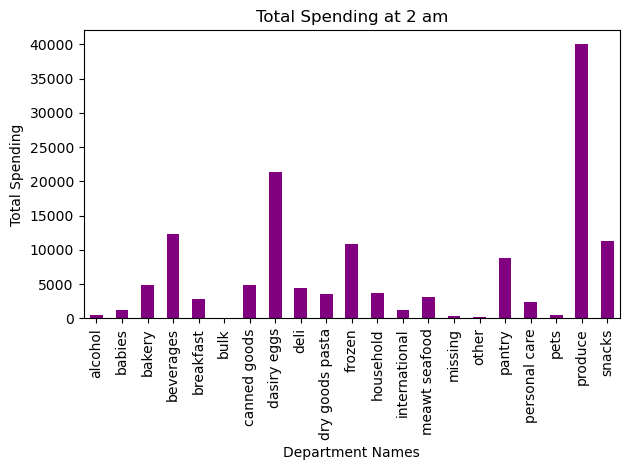

In [48]:
# Create a bar chart for total spending at 2 am grouped by departments
bar_total_spending_2am_departments = total_spend_2am_departments.plot.bar(color='purple')
plt.title('Total Spending at 2 am')
plt.ylabel('Total Spending')
plt.xlabel('Department Names')
plt.tight_layout()

In [49]:
# Export the bar chart as a png file
bar_total_spending_2am_departments.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_total_spending_2am.png'))

In [50]:
# Create a dataframe for orders at 3 am
order_hour_at_3am = ords_prods_customers_merge[ords_prods_customers_merge['order_hour_of_day'] == 3]

In [51]:
order_hour_at_3am.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,Unnamed: 0_x,order_id,...,loyalty_flag,spending_flag,order_frequency_flag,region,order_count,exclusion_flag,age_type,income_type,dependant_type,department_name
5928,127020,Female,Ohio,35,2017-01-01,3,married,68933,2112046,1771256,...,Loyal,Low spender,Frequent customer,Midwest,41,False,Adult,Middle,Has dependants,household
6003,127020,Female,Ohio,35,2017-01-01,3,married,68933,2112046,1771256,...,Loyal,Low spender,Frequent customer,Midwest,41,False,Adult,Middle,Has dependants,beverages
6020,127020,Female,Ohio,35,2017-01-01,3,married,68933,2112046,1771256,...,Loyal,Low spender,Frequent customer,Midwest,41,False,Adult,Middle,Has dependants,beverages
6066,127020,Female,Ohio,35,2017-01-01,3,married,68933,2112046,1771256,...,Loyal,Low spender,Frequent customer,Midwest,41,False,Adult,Middle,Has dependants,beverages
6929,168047,Female,Alaska,37,2017-01-01,3,married,73158,2786947,3059243,...,Regular,Low spender,Regular customer,West,8,False,Adult,Middle,Has dependants,snacks


In [52]:
# Create a dataframe for total spending at 3 am grouped by departments
total_spend_3am_departments = order_hour_at_3am.groupby(['department_name'])['order_hour_of_day'].sum()

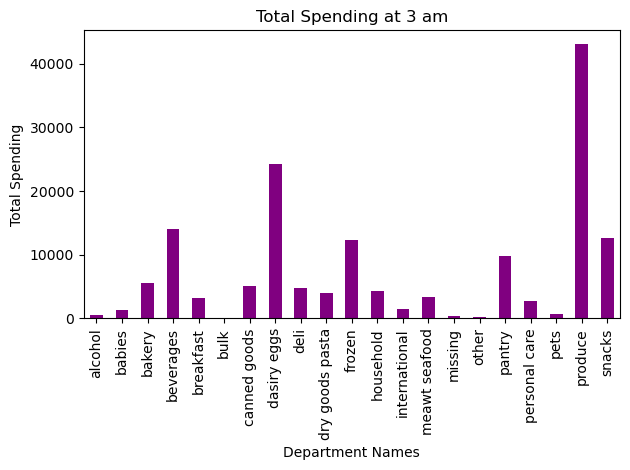

In [53]:
# Create a bar chart for total spending at 3 am grouped by departments
bar_total_spending_3am_departments = total_spend_3am_departments.plot.bar(color='purple')
plt.title('Total Spending at 3 am')
plt.ylabel('Total Spending')
plt.xlabel('Department Names')
plt.tight_layout()

In [54]:
# Export the bar chart as a png file
bar_total_spending_3am_departments.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_total_spending_3am.png'))

In [126]:
# Create a dataframe for the total spending grouped by regions
sum_spending_regions = ords_prods_customers_merge.groupby(['region'])['prices'].sum()

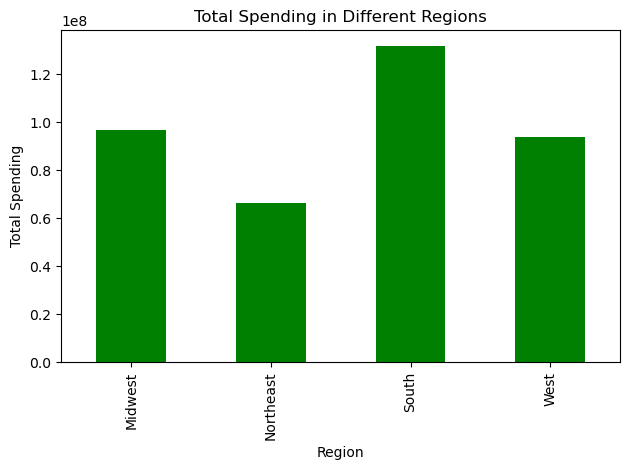

In [129]:
# Create a bar chart for the total spending grouped by regions
bar_sum_spending_regions = sum_spending_regions.sort_index().plot.bar(color='green')
plt.title('Total Spending in Different Regions')
plt.ylabel('Total Spending')
plt.xlabel('Region')
plt.tight_layout()

In [133]:
# Export the bar chart as a png file
bar_sum_spending_regions.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_total_spending_regions.png'))

In [139]:
# Create a dataframe for average income grouped by regions
avg_income_regions = ords_prods_customers_merge.groupby(['region'])['income'].mean()

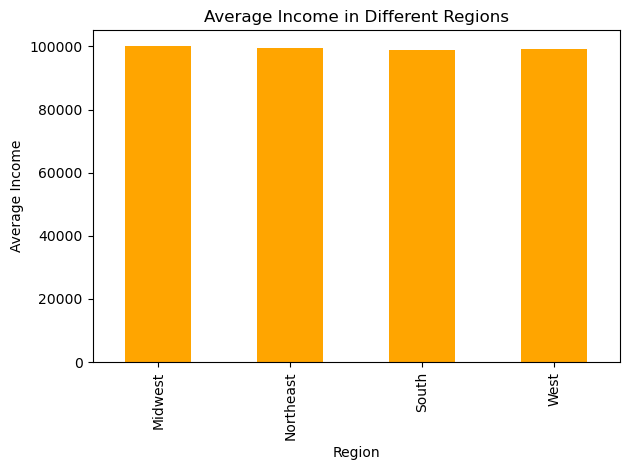

In [142]:
# Create a bar chart fot average income grouped by regions
bar_avg_income_regions = avg_income_regions.sort_index().plot.bar(color='orange')
plt.title('Average Income in Different Regions')
plt.ylabel('Average Income')
plt.xlabel('Region')
plt.tight_layout()

In [147]:
# Export the bar chart as a png file
bar_avg_income_regions.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_average_income_regions.png'))

In [151]:
# Create a dataframe for total amount of customers goruped by regions
total_customers_regions = ords_prods_customers_merge.groupby(['region'])['user_id'].nunique()

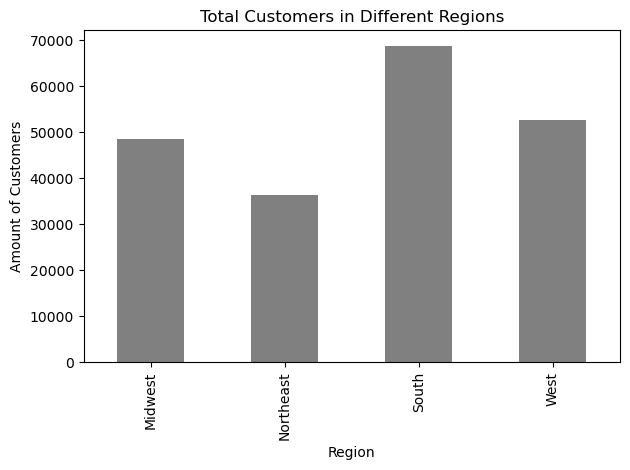

In [154]:
# Create a bar chart fot total amount of customers grouped by regions
bar_total_customers_regions = total_customers_regions.sort_index().plot.bar(color='grey')
plt.title('Total Customers in Different Regions')
plt.ylabel('Amount of Customers')
plt.xlabel('Region')
plt.tight_layout()

In [157]:
# Export the bar chart as a png file
bar_total_customers_regions.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_total_customers_regions.png'))

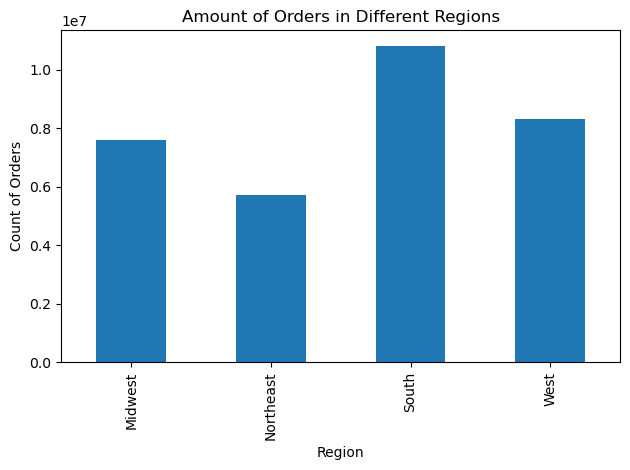

In [162]:
# Create a bar chart for the amount of orders in different regions
bar_orders_in_regions = ords_prods_customers_merge['region'].value_counts().sort_index().plot.bar()
plt.title('Amount of Orders in Different Regions')
plt.ylabel('Count of Orders')
plt.xlabel('Region')
plt.tight_layout()

In [165]:
# Export the bar chart as a png file
bar_orders_in_regions.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_amount_of_orders_regions.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Region')

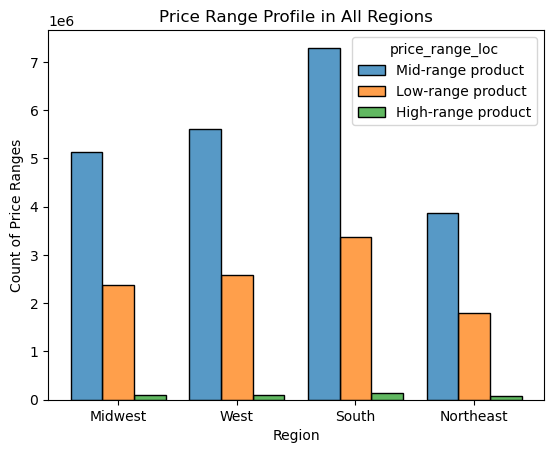

In [176]:
# Create a histogram for different price ranges grouped by regions
histplot_price_ranges_regions = sns.histplot(data=ords_prods_customers_merge,x ='region',hue='price_range_loc',multiple='dodge',shrink=.8)
plt.title('Price Range Profile in All Regions')
plt.ylabel('Count of Price Ranges')
plt.xlabel('Region')

In [182]:
# Export the histogram as a png file
histplot_price_ranges_regions.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histplot_customer_loyalty_regions.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Region')

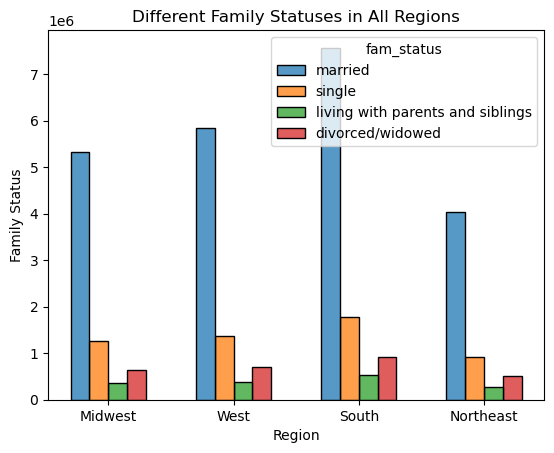

In [192]:
# Create a histogram for different family statuses in all regions
histplot_fam_status_regions = sns.histplot(data=ords_prods_customers_merge,x ='region',hue='fam_status',multiple='dodge',shrink=0.6)
plt.title('Different Family Statuses in All Regions')
plt.ylabel('Family Status')
plt.xlabel('Region')

In [196]:
# Export the bar chart as a png file
histplot_fam_status_regions.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histplot_fam_status_regions.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Region')

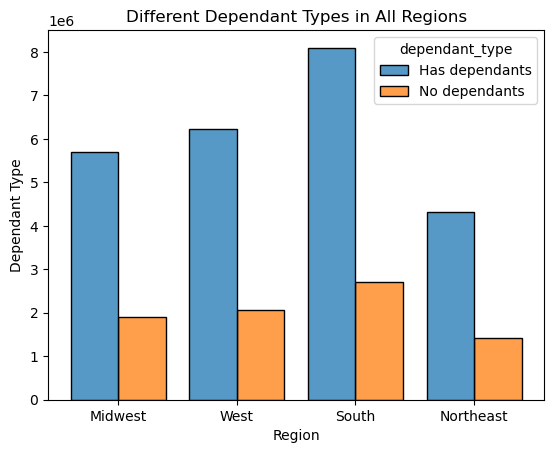

In [199]:
# Create a histogram for different dependant types goruped by regions
histplot_dependant_types_regions = sns.histplot(data=ords_prods_customers_merge,x ='region',hue='dependant_type',multiple='dodge',shrink=.8)
plt.title('Different Dependant Types in All Regions')
plt.ylabel('Dependant Type')
plt.xlabel('Region')

In [203]:
# Export the histogram as a png file
histplot_dependant_types_regions.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histplot_dependant_types_regions.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Region')

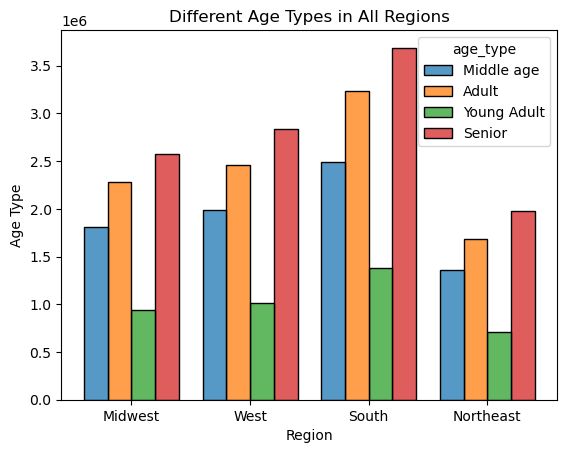

In [206]:
# Create a histogram for different age types goruped by regions
histplot_age_types_regions = sns.histplot(data=ords_prods_customers_merge,x ='region',hue='age_type',multiple='dodge',shrink=.8)
plt.title('Different Age Types in All Regions')
plt.ylabel('Age Type')
plt.xlabel('Region')

In [209]:
# Export the histogram as a png file
histplot_age_types_regions.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histplot_age_types_regions.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Region')

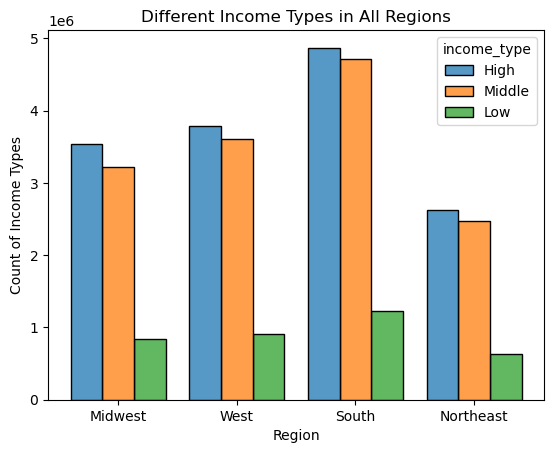

In [212]:
# Create a histogram for different income types grouped by regions
histplot_income_types_regions = sns.histplot(data=ords_prods_customers_merge,x ='region',hue='income_type',multiple='dodge',shrink=.8)
plt.title('Different Income Types in All Regions')
plt.ylabel('Count of Income Types')
plt.xlabel('Region')

In [216]:
# Export the histogram as a png file
histplot_income_types_regions.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histplot_income_types_regions.png'))

In [221]:
ords_prods_customers_merge.shape

(32434212, 39)